# Visualization of the feature space by two methods

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from dndmlpy.character_loading_pipeline import load_json, json_to_list_of_characters, all_skills, popular_weapons, build_input_data, build_output_data, filter_charlist
from dndmlpy.analysis_utils import tsne_points_by_label, umap_points_by_label, visualize_clustering_results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
json_file = "lib/dnddata/data-raw/dnd_chars_unique.json"
loaded_json = load_json(json_file)
character_list = json_to_list_of_characters(loaded_json)
character_list = filter_charlist(character_list)
list_of_possible_skills = all_skills(character_list)
popularity_threshold = 0.005
list_of_popular_weapons = popular_weapons(character_list, popularity_threshold)

In [10]:
full_feature_matrix = build_input_data(
    character_list,
    possible_skills_list=list_of_possible_skills,
    possible_weapons_list=list_of_popular_weapons,
    include_attributes=True,
    include_skills=True,
    include_weapons=True,
    include_char_names=False,
)
class_labels = build_output_data(character_list)

In [11]:
tsne_data = tsne_points(full_feature_matrix, perplexity=70)

In [12]:
umap_data = umap_points(full_feature_matrix)

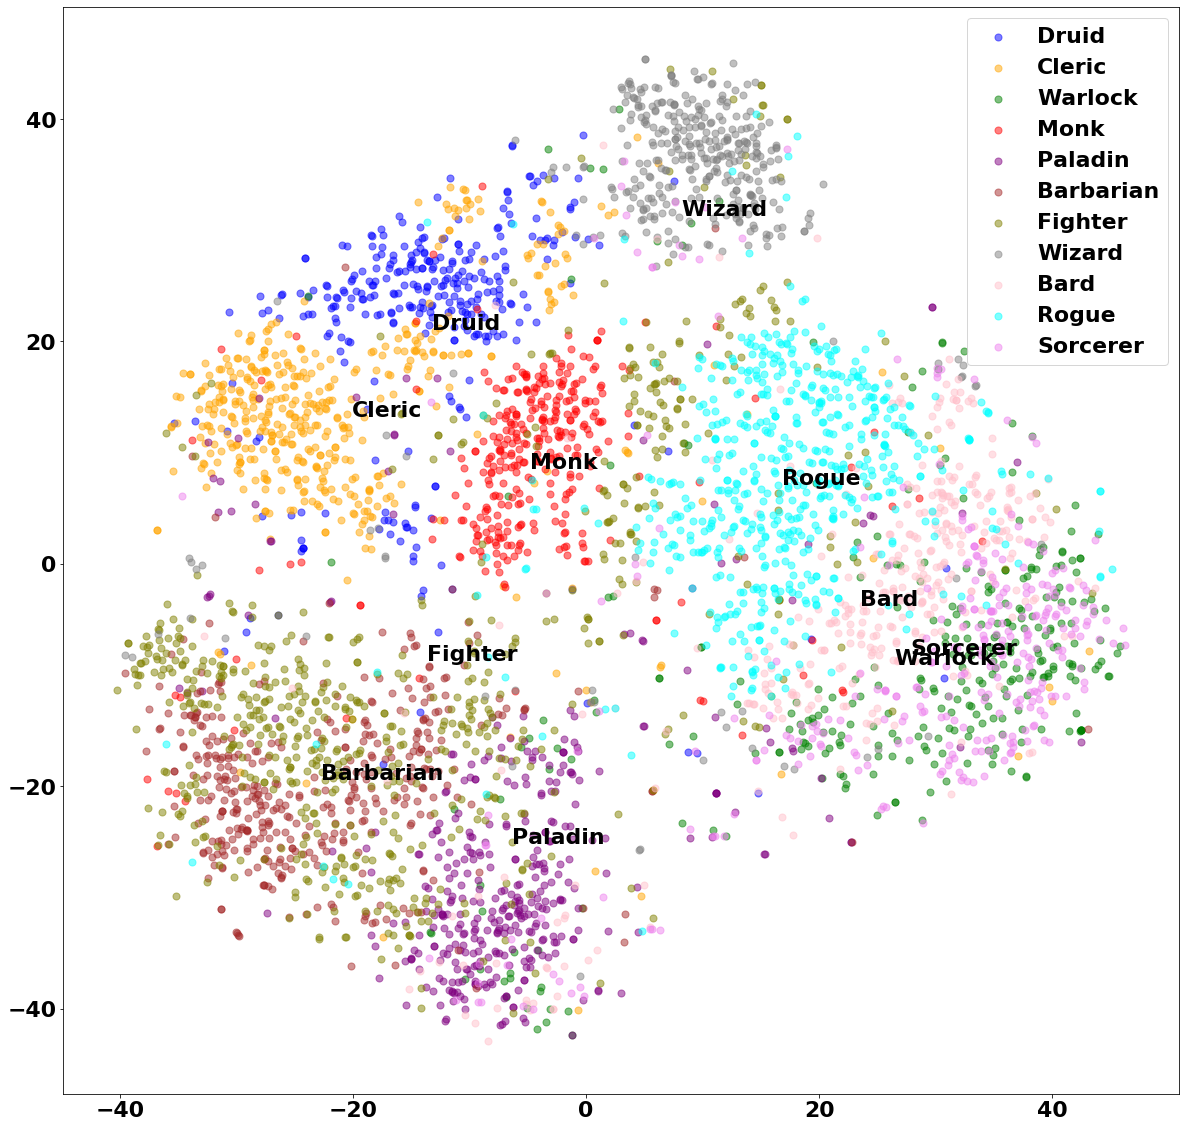

In [13]:
visualize_clustering_results(tsne_data, class_labels)

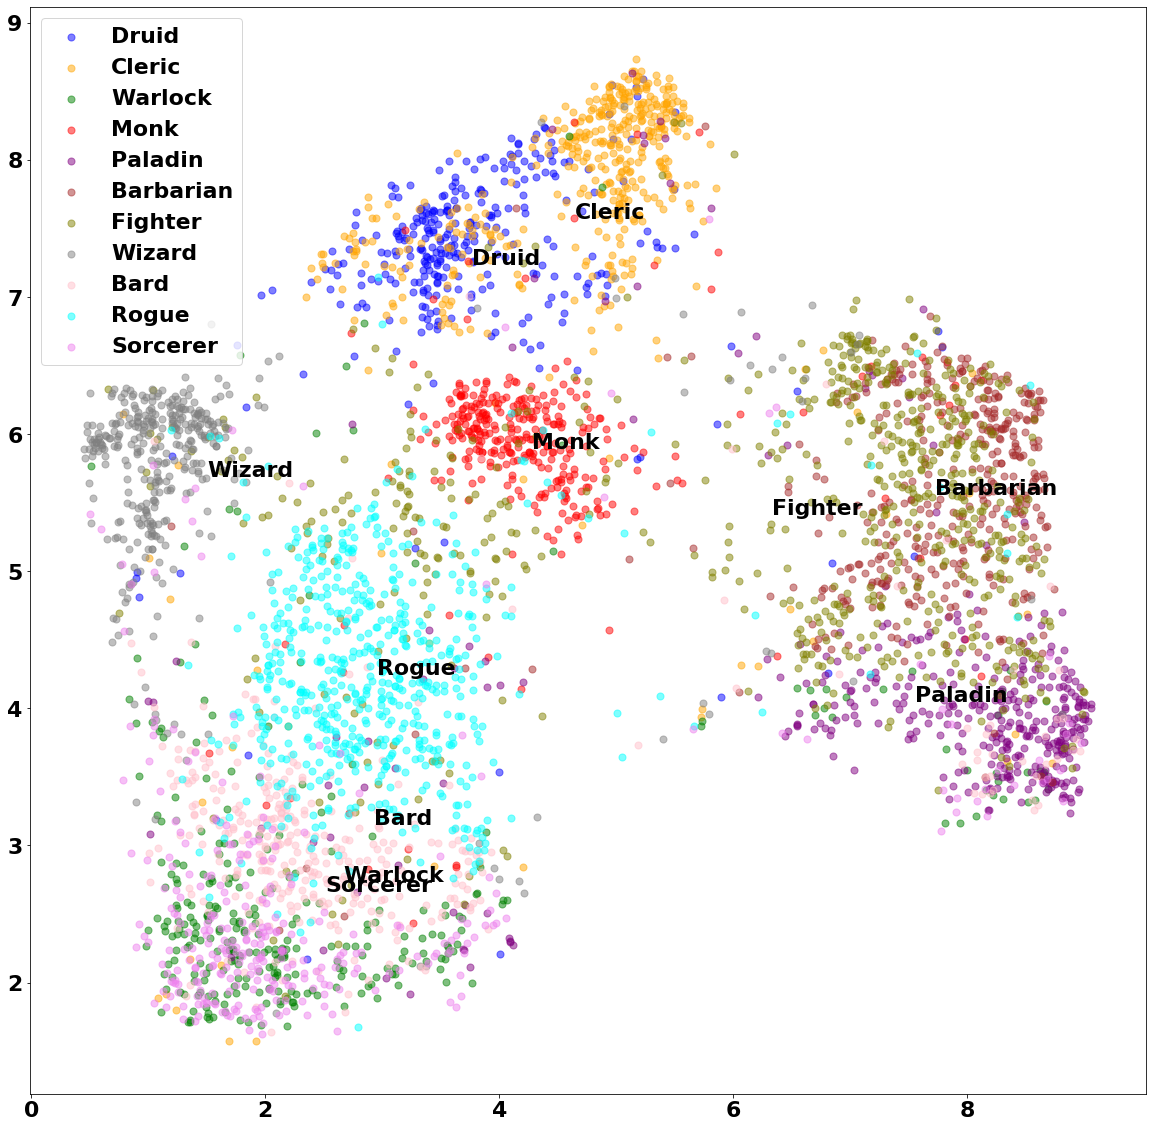

In [14]:
visualize_clustering_results(umap_data, class_labels)